<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/PG/%ED%83%9D%EB%B0%B0_%EB%B0%B0%EB%8B%AC%EA%B3%BC_%EC%88%98%EA%B1%B0%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 택배 배달과 수거하기

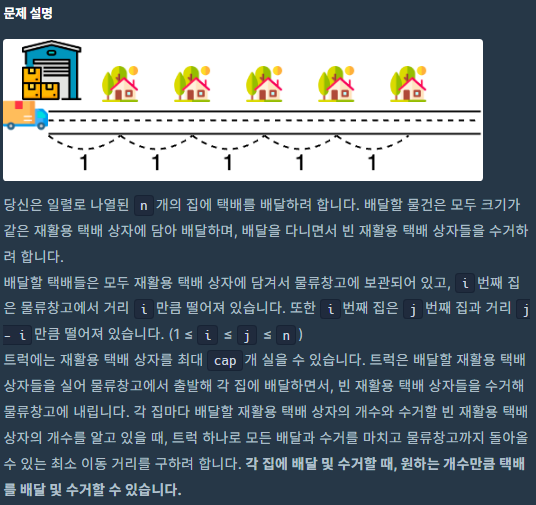

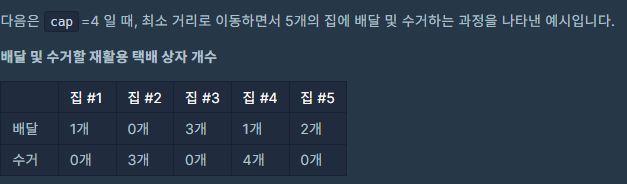

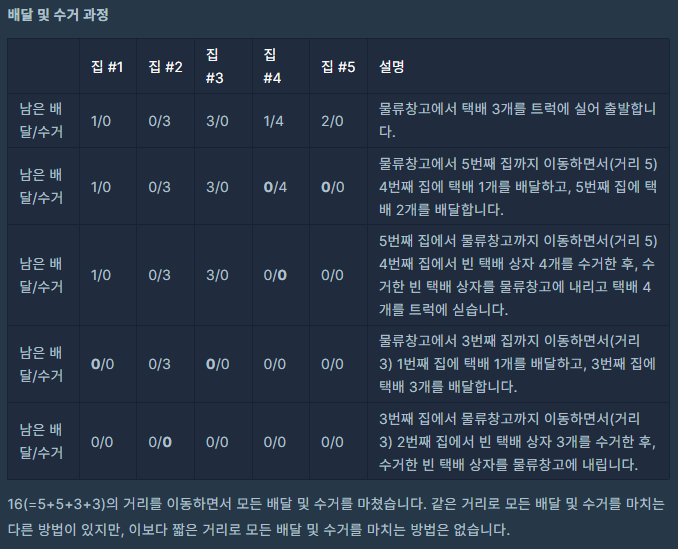

## 입력 출력 및 예제


* 입력

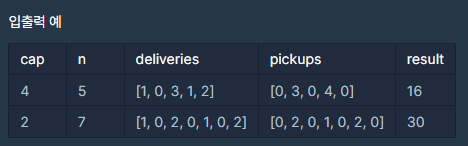

* 출력

* 예제


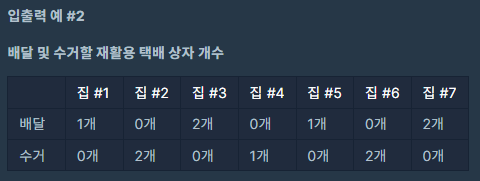

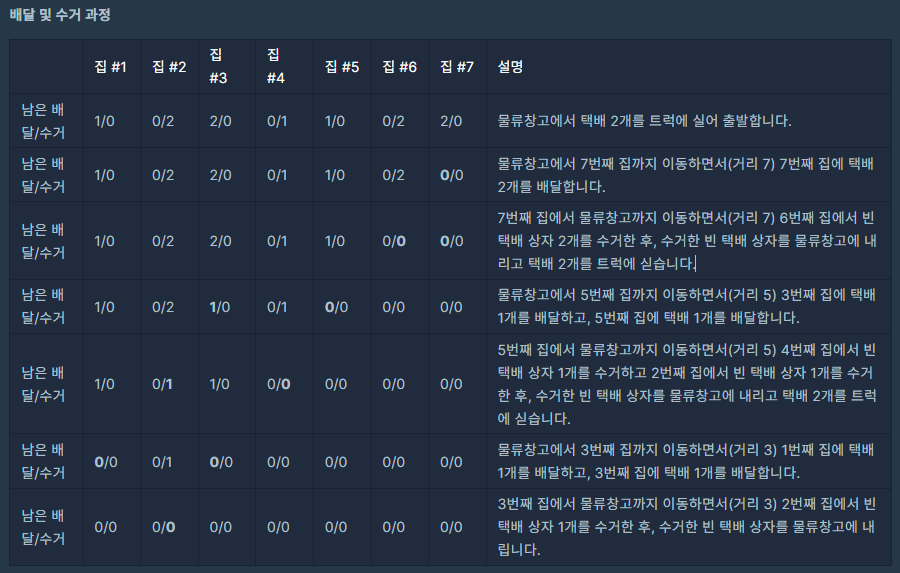

## 구상

- 명확한 해법이 안떠오른다
- 그냥 기본적으로 코딩하면서 수정해나가보자

## 코드

In [ ]:
def solution(cap, n, deliveries, pickups):
    answer = -1
    return answer

In [3]:
# 시간초과
def solution(cap, n, deliveries, pickups):
    answer = 0
    d_remain = deliveries[:]
    p_remain = pickups[:]

    # 뒤에서부터 반복
    i = n - 1
    while i >= 0:
        # 배달 or 수거가 남아있는 가장 먼 거리 찾기
        while i >= 0 and d_remain[i] == 0 and p_remain[i] == 0:
            i -= 1
        if i < 0:
            break

        # 왕복 거리 더하기
        answer += (i + 1) * 2

        # 현재 거리부터 cap만큼 배달 및 수거 처리
        d_cap = cap
        p_cap = cap
        for j in range(i, -1, -1):
            # 배달 처리
            if d_remain[j] > 0:
                deliver_now = min(d_remain[j], d_cap)
                d_remain[j] -= deliver_now
                d_cap -= deliver_now

            # 수거 처리
            if p_remain[j] > 0:
                pickup_now = min(p_remain[j], p_cap)
                p_remain[j] -= pickup_now
                p_cap -= pickup_now

            if d_cap == 0 and p_cap == 0:
                break

    return answer

In [ ]:
# 통과
def solution(cap, n, deliveries, pickups):
    answer = 0

    d_stack = deliveries[:]
    p_stack = pickups[:]

    while d_stack or p_stack:
        # 배달/수거 스택에서 0만 남은 뒤쪽은 잘라냄
        while d_stack and d_stack[-1] == 0:
            d_stack.pop()
        while p_stack and p_stack[-1] == 0:
            p_stack.pop()

        # 현재 왕복해야 할 거리
        dist = max(len(d_stack), len(p_stack))
        answer += dist * 2

        # cap 만큼 배달
        d_cap = cap
        for i in range(len(d_stack)-1, -1, -1):
            if d_cap == 0:
                break
            if d_stack[i] <= d_cap:
                d_cap -= d_stack[i]
                d_stack[i] = 0
            else:
                d_stack[i] -= d_cap
                d_cap = 0
                break  # 이 위치 이후는 다음 라운드로 넘김

        # cap 만큼 수거
        p_cap = cap
        for i in range(len(p_stack)-1, -1, -1):
            if p_cap == 0:
                break
            if p_stack[i] <= p_cap:
                p_cap -= p_stack[i]
                p_stack[i] = 0
            else:
                p_stack[i] -= p_cap
                p_cap = 0
                break

    return answer


In [4]:
cap, n = 4, 5
d = [1, 0, 3, 1, 2]
p = [0, 3, 0, 4, 0]

In [5]:
solution(cap,n,d,p)

16

In [2]:
sum(d)

7

### 메모

*